##### Integrantes: Cristián Astorga González, Ailine Morales Álvarez.



<h1 style="text-align:center;font-family: 'Computer Modern Sans';font-weight:bolder">Proyecto Final Electivo Ciencia de Datos</h1>
<h5 style="text-align:center;font-family: 'Computer Modern Sans';font-weight:bolder">EDA y Modelamiento</h5>


### Instrucciones:

* El proyecto debe ser enviado al email gabriel.tamayo@usach.cl antes de las 23:59 horas del dia Viernes 22 de Enero 2021.
* El proyecto puede ser resuelto en su totalidad utilizando las librerías de Python revisadas durante las clases.
* Es libre de utilizar librerías externas a las revisadas en clases siempre y cuando sea para análisis complementario al mínimo requerido en la Rúbrica de Evaluación.
* La copia será sancionada con nota mínima.
* El proyecto puede realizarse en equipos de máximo 2 personas.




### Descripción del Problema

Se cuenta con un conjunto de datos (Advertising.csv) con cantidades de inversión publicitaria en diferentes canales y el impacto de dicha inversión en la venta de un producto. El objetivo del proyecto será realizar un análisis exploratorio EDA de nuestros datos para luego dar paso a dos tipos de modelamiento; modelamiento econométrico para entender cómo la inversión en diferentes canales de publicidad afecta el promedio de venta del producto y luego un modelamiento desde una perspectiva de machine Learning donde buscaremos un modelo que nos permita generalizar, predecir sobre un conjunto de datos desconocido.


#### Objetivos específicos

* Realizar una descripción del dataset utilizado (contexto) y un análisis exploratorio.
* Elaborar un análisis económico lineal utilizando la librería Statsmodels que nos permita entender cómo las variables independientes afectan a la dependiente (sales).
* Elaborar un Modelo de Machine Learning utilizando la librería sklearn de Python que en base a diferentes cantidades de inversión en canales de publicidad nos permita decir cuál será la venta del producto.
* Utilizar métricas de desempeño que nos permitan evaluar la calidad de nuestros modelos.



#### Rúbrica de Evaluación

Se evaluará:

* Buenas prácticas de programación, orden y estructura (Contexto, EDA, Modelamiento Econométrico, Modelamiento Predictivo, conclusiones finales).
* Coherencia en la narrativa del análisis realizado.
* Utilización de las librerías de modelamiento
* Proceso correcto de entrenamiento y evaluación de modelo Machine Learning.

    
Como mínimo se espera:

* Para EDA:
    * Análisis exploratorio de cada variable (univariado) y la relación con la variable objetivo (multivariado).
    * Narrativa

    
    
* Para Modelamiento Econométrico
    * Narrativa
    * Generar un modelo de regresión lineal simple donde utilizaremos como variable dependiente las Ventas (Sales) y como variable independiente la inversión en publicidad en TV.
    * Obtener el valor de los coeficientes respectivos y graficar en un mismo plot los puntos x,y y la recta obtenida.
    * Según el modelo obtenido responder; cómo afecta a las ventas la inversión de 1000 dólares en publicidad en TV?, es decir, cuantos productos más venderé en promedio si invierto 1000 dólares en publicidad en TV?
    * Sabemos que el modelo de regresión simple con el método OLS (Ordinary least Square) busca minimizar el RSS (residual sum of squares). Explique que es el RSS y cual es el valor mínimo de RSS que encontró su modelo?
    * Genere un Modelo Saturado (utilizando todos los regresores) y comente los resultados.



* Para Modelamiento de Machine Learning:
    * Narrativa
    * Separar el conjunto de datos en entrenamiento y testeo
    * Generar un modelo de regresión Lineal utilizando solo TV como variable independiente y Sales como dependiente
    * Evaluar el modelo sobre el conjunto de testeo utilizando las métricas MSE (Mean Square Error) y MAE (Mean Absolute Error). ¿Cuál es la diferencia de estos dos tipos de métricas y que explica cada una?. Porque el coeficiente de TV difiere en comparación al encontrado desde el punto de vista econométrico?
    * Generar un modelo saturado (todos los regresores) y utilizar las mismas métricas de calidad.
    * Generar un modelo con solo los regresores TV y radio y evalúe las mismas métricas de calidad.
    *  Comparar los resultados predictivos de los tres modelos de ML.


#### Entregables

Al finalizar el proyecto se deben enviar al correo gabriel.tamayo@usach.cl un archivo comprimido con el siguiente contenido:
* Archivo notebook de terminación .ipynb que contendrá todo el análisis realizado (incluir dentro del notebook nombres de los integrantes del equipo).
* Archivo Advertising.csv
* Archivos .py, si utiliza algún archivo auxiliar para almacenar sus funciones
* Imagenes, si utiliza imágenes dentro de su Jupyter Notebook

 

<h1 style="text-align:center;font-family: 'Computer Modern Sans';font-weight:bolder">Proyecto Final Electivo Ciencia de Datos</h1>

El objetivo de este trabajo es crear un modelo predictivo para el impacto de las ventas dada una cierta inversion en distintos medios como TV, radio y prensa escrita. Para ello importaremos una base de datos con información sobre productos y el impacto en sus ventas luego de una inversión en distintos medios publicitarios.

Iniciaremos este analisis con la importación de nuestras herramientas para la programación, Libreria Ds para manipular nuestros datos, Librerias de visualización para graficar, libreria Machine Learning para crear un modelo predictivo y librerias para realizar un modelo econométrico.

In [1]:
#Libreria Ds
import pandas as pd
import numpy as np

#libreria Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Libreria Ml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

#librerias modelo econométrico
import statsmodels.formula.api as smf
import statsmodels.api as sm

Leemos nuestros datos sobre los cuales haremos un analisis exploratorio

In [3]:
#lectura de archivo
df = pd.read_csv("Advertising.csv")
#eliminacion de "columna unnamed : 0"
df = df.drop(columns="Unnamed: 0")
#Mostramos nuestros datos
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Tenemos 200 productos con inversiones en publicidad para TV, radio y/o prensa escrita en miles de dolares. En la columna sales tenemos la venta de producto dada la inversión en publicidad en miles de unidades.

<h4 style="font-weight:300; color: #0c8fd5;"> EXPLORACIÓN DE DATOS</h2>

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Tenemos 200 datos en cada columna, en promedio las inversiones son mayores en TV.

<h4 style="font-weight:300; color: purple;"> Análisis univariado y multivariado</h2>

Ahora definiremos funciones para generar graficos y ver la distribución de nuestros datos

In [13]:
def distribucion(df,var):
    """
    Esta función grafica un histograma y un boxplot para cada variable y los deja uno al lado del otro.
    """
    plt.figure(figsize = (14,4))
    plt.subplot(1,2,1)
    plt.title(f"Histograma de {var}")
    sns.distplot(df[var]);
    plt.subplot(1,2,2)
    plt.title(f"Boxplot de {var} ")
    sns.boxplot(df[var]);
#Definimos una función para poder hacer los gráficos scatterplot solo cambiando la variable.
def scatter(df,var1):
    """
    Esta función grafica una distribución marcando puntos en un plano cartesiano 
    """
    plt.title(f"Gráfico de dispersión Scatterplot de {var1}")
    sns.scatterplot(df[var1],df["sales"]);

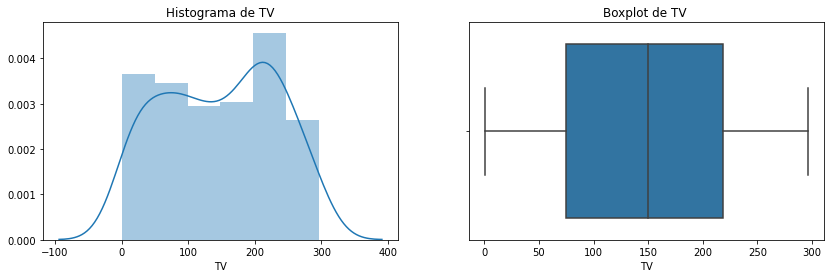

In [10]:
distribucion(df,"TV")

En la distribucion de las inversiones en TV podemos apreciar una media de 150 y la mayoria de los datos sobre 50

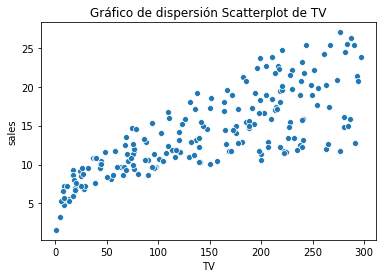

In [14]:
scatter(df,"TV")

Con respecto al impacto de la inversion publicitaria en TV podemos encontrar una cierta relación lineal, a medida que aumenta la inversion, aumentan las ventas.

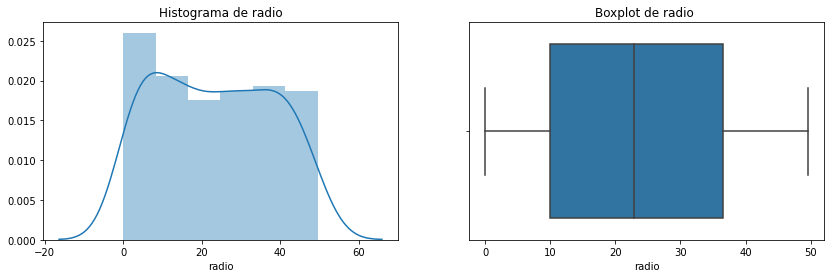

In [12]:
distribucion(df,"radio")

Media de 23 y mayor tendencia a bajas inversiones

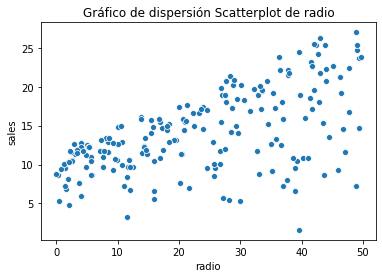

In [15]:
scatter(df,"radio")

No se aprecia una relación certera, ya que observamos muchos datos con alta inversion y variados impactos en la venta.

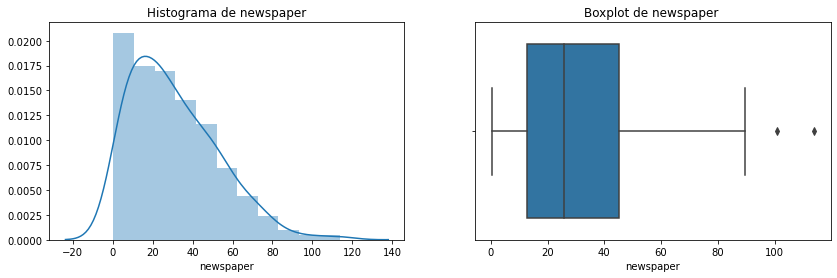

In [16]:
distribucion(df,"newspaper")

Mayor tendencia a bajas inversiones con algunas pocas excepciones de gran inversion.

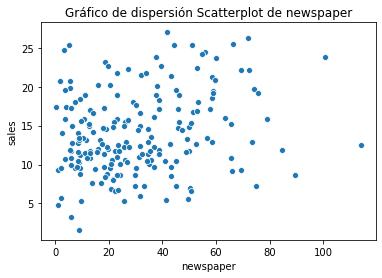

In [17]:
scatter(df,"newspaper")

Con respecto a las altas inversiones excepcionales vistas en el grafico anterior, no podemos asegurar resultados positivos ya que existe una gran diferencia para ambos productos, incusive el de mayor inversion tiene mucho menos ventas que el de segunda mayor inversion.
No se aprecía ningun atisbo de relación lineal.

<h4 style="font-weight:300; color: purple;"> Análisis de correlaciones</h2>

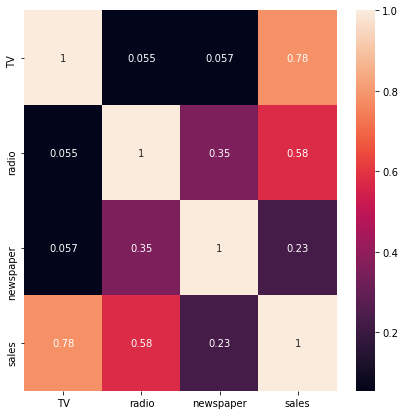

In [21]:
corr = df.corr()
plt.figure(figsize = (7,7))
sns.heatmap(corr,annot=True);

Según la matriz de correlaciones, tenemos en orden descendente de importancia a TV, radio y periódicos.

<h4 style="font-weight:300; color: #0c8fd5;"> MODELO ECONOMÉTRICO</h2>

<h4 style="font-weight:300; color: purple;"> MODELO DE REGRESIÓN LINEAL SIMPLE</h2>

Utilizando la libreria smf, especificamente al método ols modelaremos los datos como una regresión lineal, donde la variable dependiente será "sales" y la independiente "TV".

In [24]:
modelo = smf.ols("sales ~ TV ", data = df).fit()

Para obtener el valor de los coeficientes de nuestro modelo de regresión utilizaremos la función summary(), que nos estregará un modelo del resumen que incluye los datos que necesitamos:

In [25]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           1.47e-42
Time:                        18:55:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Los coeficientes que nos interesarán para el siguiente gráfico son coef Intercept = B0 = 7.0326 y coef TV =  B1 = 0.0475. 

La siguiente función corresponde al ajuste lineal y_pred(x) = B1x + B0: 

In [79]:
 def y_pred(x):
    """
    Esta función nos entrega el impacto en las ventas dada una inversión en TV.
    """
    return B1*x+ B0

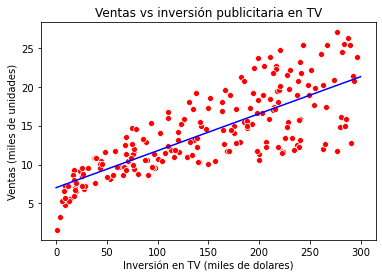

In [27]:
B1 = 0.0475
B0 = 7.0326
sns.scatterplot(x = "TV",y = "sales",data = df, color="red") #creamos el gráfico 
plt.plot([0,300],[0*B1+B0 ,B1*300+B0 ],color="blue") #Agregamos una recta que describe el modelo econométrico
plt.title("Ventas vs inversión publicitaria en TV")
plt.xlabel("Inversión en TV (miles de dolares)")
plt.ylabel("Ventas (miles de unidades)");

Consideremos una inversión de 1000 dolares en publicidad en TV y veamos como se comporta en nuestro ajuste lineal mediante la función y_pred(x) antes definida. Como la inversión está en miles de dolares, nuestro x será 1:

In [28]:
y_pred(1)

7.080100000000001

Según nuestro modelo invertir 1000 dólares en publicidad en TV se ve reflejado en la venta de aproximadamente 7 mil unidades más de productos en promedio.

Otro valor importante que nos entrega summary() será el error standar de TV. Este error corresponde a a la minimización del modelo RSS.

Podemos definir el RSS como la suma de los residuos al cuadrado, donde residuo está definido como (y - y_pred), es decir, la distancia entre el valor real de los datos y el valor predicho por nuestro modelo de regresión lineal. Cuando nos referimos a minimizar, hablamos del método OLS en donde obtenemos el residuo más pequeño lo que nos asegura que el ajuste de la recta al conjunto de puntos será el mejor. 

Para nuestro modelo el valor mínimo de RSS encontrado es de 0.003. Lo que nos falta analizar es si nuestro error y el coeficiente B1(coef TV) son plausibles, esto lo haremos mediante el siguiente gráfico de residuos vs valores ajustados, donde los valores ajustados corresponden al y_pred.

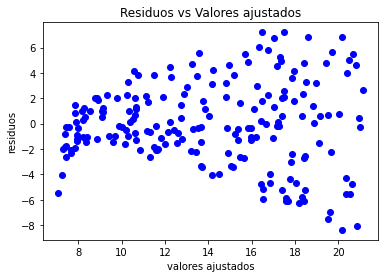

In [29]:
plt.plot(modelo.predict(df["TV"]),modelo.resid,"bo") #creación del gráfico
plt.title("Residuos vs Valores ajustados")
plt.xlabel("valores ajustados")
plt.ylabel("residuos");

Podemos notar que el coeficiente B1 y el error standar son plausibles pues el gráfico tiene una distribución random de los errores al rededor de cero, sin tendencia ni a la media de los residuos ni a su variabilidad a medida que su valor incrementa.

<h4 style="font-weight:300; color: purple;"> MODELO DE REGRESIÓN LINEAL SATURADO</h2>

Realizamos un modelo de regresión lineal saturado con variables independientes "TV","newspaper" y "radio"y variable dependiente "sales. Al igual que en el modelo de regresión lineal simple, usaremos el método ols.

In [31]:
modelo1 = smf.ols("sales ~ TV + radio + newspaper ", data = df).fit()

In [32]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           1.58e-96
Time:                        18:59:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Graficamos para cada una de las variables independientes:

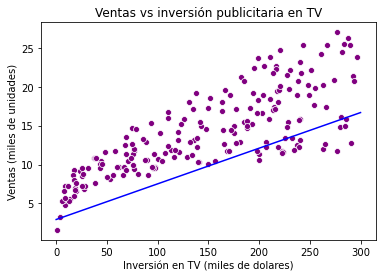

In [33]:
B1 = 0.0458
B0 = 2.9389
sns.scatterplot(x = "TV",y = "sales",data = df, color="purple") #creamos el gráfico 
plt.plot([0,300],[0*B1+B0 ,B1*300+B0 ],color="blue")#Agregamos una recta que describe el modelo econométrico
plt.title("Ventas vs inversión publicitaria en TV")
plt.xlabel("Inversión en TV (miles de dolares)")
plt.ylabel("Ventas (miles de unidades)");

A diferencia del gráfico del modelo lineal simple, esta recta pasa por debajo de la mayoría de los punto, pero aún asi sigue la tendencia de los puntos a crecer.

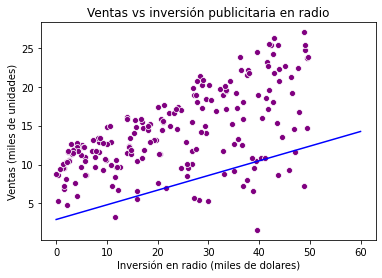

In [72]:
B1 = 0.1885
B0 =  2.9389
sns.scatterplot(x = "radio",y = "sales",data = df, color="purple") #creamos el gráfico 
plt.plot([0,60],[0*B1+B0 ,B1*60+B0 ],color="blue") #Agregamos una recta que describe el modelo econométrico
plt.title("Ventas vs inversión publicitaria en radio")
plt.xlabel("Inversión en radio (miles de dolares)")
plt.ylabel("Ventas (miles de unidades)");

Notemos que a pesar que la recta queda muy alejada de la mayoría de los puntos(error std alto) sigue su tendencia a crecer. 

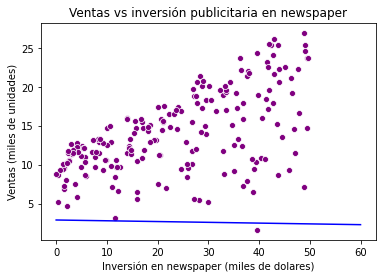

In [82]:
B1 = -0.010
B0 =  2.9389
sns.scatterplot(x = "radio",y = "sales",data = df, color="purple") #creamos el gráfico 
plt.plot([0,60],[0*B1+B0 ,B1*60+B0 ],color="blue") #Agregamos una recta que describe el modelo econométrico
plt.title("Ventas vs inversión publicitaria en newspaper")
plt.xlabel("Inversión en newspaper (miles de dolares)")
plt.ylabel("Ventas (miles de unidades)");

Esta recta no se ajusta para nada a los datos de newspaper. La recta tiene tendencia de decrecer y los puntos a crecer.

 <h4 style="font-weight:300; color: blue;"> CONCLUSIONES SOBRE EL MODELO ECONOMÉTRICO</h2>

Podemos decir que al comparar el gráfico "Ventas vs inversión en TV" con ambos modelos el primero visualmente parece mejor ajustado pero el error std del modelo saturado es menor(0.003 vs 0.001). El problema del modelo saturado viene de que el error std de sus otras variables independiente es muy alto(a comparación de los otros errores). Por lo tanto el modelo saturado no se ajusta a todas sus variables independiente, osea si a un cliente le pides información sobre(TV, radio, newspaper) la predicción sería más correcta si solo usaramos la columna TV y radio, pues en el gráfico de inversiones en radio vs sales también tiende a ajustarse al modelo regresión lineal(con respecto al crecimiento).

Con esto concluimos que el modelo econométrico de regresión lineal simple es mejor que el saturado para todo el conjunto de datos.

<h4 style="font-weight:300; color: #0c8fd5;"> MODELO MACHINE LEARNING</h2>

Definimos diferentes variables para entrenar distintos modelos

In [36]:
X = df[["TV","radio","newspaper"]] #modelo saturado
y = df["sales"]
X1= df[["TV","radio"]] #Modelo de TV  y radio.
X2 = df[["TV"]] #Modelo solo TV.

Separamos en datos para entrenar y datos para probar nuestro modelo

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3, random_state =505) #modelo saturado
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y,test_size = .3,random_state =505) #Modelo de TV  y radio.
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y,test_size = .3,random_state =505)#Modelo solo TV.

In [62]:
X1_train 

,TV,radio
150,280.7,13.9
8,8.6,2.1
154,187.8,21.1
24,62.3,12.6
194,149.7,35.6
...,...,...
158,11.7,36.9
115,75.1,35.0
149,44.7,25.8
156,93.9,43.5


In [63]:
# Definición del modelo de regresión lineal 
Regresion = LinearRegression(fit_intercept = True)

In [64]:
# Entrenamiento del modelo de regresión lineal 1
Modelo1 = Regresion.fit(X_train,y_train) #modelo saturado
y_pred = Modelo1.predict(X_test)

In [65]:
# Entrenamiento del modelo de regresión lineal 2
Modelo2 = Regresion.fit(X1_train,y1_train) #Modelo de TV  y radio.
y1_pred = Modelo2.predict(X1_test)

In [66]:
# Entrenamiento del modelo de regresión lineal 3
Modelo3 = Regresion.fit(X2_train,y2_train)#Modelo solo TV.
y2_pred = Modelo3.predict(X2_test)

Luego de entrenar nuestros modelos procedemos a hacer las comparaciones entre ellos. Para esto introduciremos 3 tipos de errores: el error cuadrático medio, el error absoluto medio y la raíz del error cuadrático medio.

La diferencia entre el error cuadrático medio y el error absoluto medio es que el primero al elevar al cuadrado las componentes de la distancia genera un mayor valor si es que la distancia es muy grande, en comparación con el segundo error.

CÁLCULO DE ERRORES

In [80]:
def Calcula_errores(var1,var2):
    """
    Esta función calcula los tres tipos de error.
    """
    print(f"El error cuadrático medio es: {mean_squared_error(var1,var2)}")
    print(f"El error absoluto medio es: {mean_absolute_error(var1,var2)}")
    print(f"La raíz del error cuadrático medio es: {np.sqrt(mean_squared_error(var1,var2))}")

In [68]:
#Calculamos errores del modelo saturado
Calcula_errores(y_test,y_pred)

El error cuadrático medio es: 2.5702760821382964
El error absoluto medio es: 1.2572460501521978
La raíz del error cuadrático medio es: 1.6032080595288611


In [69]:
#Calculamos errores del modelo TV y radio
Calcula_errores(y1_test,y1_pred)

El error cuadrático medio es: 2.564266381797401
El error absoluto medio es: 1.2645294850680904
La raíz del error cuadrático medio es: 1.6013326892927031


In [70]:
#Calculamos errores del modelo SOLO TV
Calcula_errores(y2_test,y2_pred)

El error cuadrático medio es: 10.587340438327901
El error absoluto medio es: 2.5169112453722855
La raíz del error cuadrático medio es: 3.2538193616622144


<h4 style="font-weight:300; color: blue;"> COMPARACIÓN DE ERRORES DE LOS 3 MODELOS DE MACHINE LEARNING</h2>

Primero mencionar que para comparar el error cuadrático medio y el error absoluto medio es necesario sacar la raíz, en nuestro caso el error cuadratico medio es el mayor en todos los modelos. Esto nos indica que algunas predicciones estan muy alejadas de su valor real.

El menor error absoluto medio es el del modelo saturado, pero como los errores entre este modelo y el de (TV,radio) son muy similares, consideraremos que el modelo (TV,radio) es el mejor.

Los errores del modelo de TV son mayores que el del modelo (TV,radio) ya que la columna radio parece disipar los errores. 

<h4 style="font-weight:300; color: #0c8fd5;"> CONCLUSIONES MODELO MACHINE LEARNING Y MODELO ECONOMÉTRICO</h2>

Sabemos que el coeficiente de TV que el modelo econométrico nos entrega es de 0.0475 y el del modelo de machine learning es de 0.04951191

In [78]:
Modelo3.coef_

array([0.04951191])

Estos coeficientes son distintos porque en el modelo econométrico hicimos uso de todos los datos que nos entregaba el dataframe, en cambio en el modelo de machine learning usamos el 30% para para el testeo.

Para poder decidir si nuestro modelo es lo suficientemente bueno deberíamos probarlo con datos externos a nuestra base de datos original y analizar los respectivos errores, pero el modelo (TV,radio) presenta un estandar aceptable para los modelos de tipo lineal.